In [1]:
import tensorflow as tf

In [6]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle datasets download -d jangedoo/utkface-new

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
 75% 249M/331M [00:00<00:00, 769MB/s] 
100% 331M/331M [00:06<00:00, 51.3MB/s]


In [8]:
import zipfile

with zipfile.ZipFile("utkface-new.zip", 'r') as zip_ref:
    zip_ref.extractall("utkface_dataset")

In [9]:
import pandas as pd
import numpy as np
import os
import math

In [10]:
Dir = '/content/utkface_dataset/UTKFace'

In [12]:
age=[]
gender=[]
imagePath=[]
for file in os.listdir(Dir):
    z=file.split('_')
    age.append(int(z[0]))
    gender.append(int(z[1]))
    imagePath.append(file)

In [13]:
df = pd.DataFrame(imagePath,columns=['filePath'])

In [14]:
df['age'] = age
df['gender'] = gender

In [15]:
df.head()

,filePath,age,gender
0,40_0_0_20170104205218667.jpg.chip.jpg,40,0
1,44_0_0_20170105172858549.jpg.chip.jpg,44,0
2,34_0_0_20170117104600843.jpg.chip.jpg,34,0
3,68_0_0_20170104213011828.jpg.chip.jpg,68,0
4,35_0_0_20170117143404590.jpg.chip.jpg,35,0


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='age', ylabel='Density'>

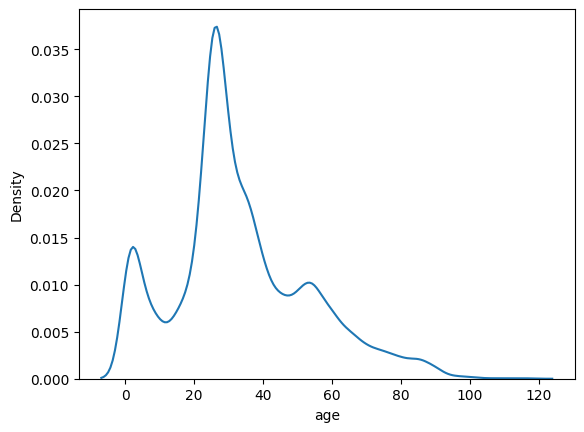

In [17]:
sns.kdeplot(df['age'])

In [18]:
# normalizing the age input
df['age'] = df['age']/100.0

In [19]:
df.head()

,filePath,age,gender
0,40_0_0_20170104205218667.jpg.chip.jpg,0.40,0
1,44_0_0_20170105172858549.jpg.chip.jpg,0.44,0
2,34_0_0_20170117104600843.jpg.chip.jpg,0.34,0
3,68_0_0_20170104213011828.jpg.chip.jpg,0.68,0
4,35_0_0_20170117143404590.jpg.chip.jpg,0.35,0


<Axes: xlabel='age', ylabel='Density'>

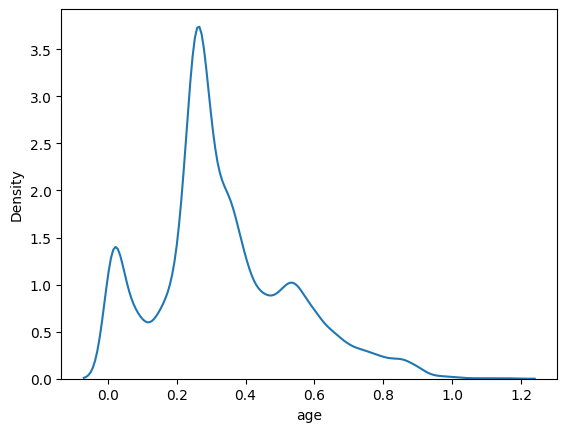

In [20]:
sns.kdeplot(df['age'])

In [21]:
df=df[df['age'] <= 0.8]

In [22]:
df.head()

,filePath,age,gender
0,40_0_0_20170104205218667.jpg.chip.jpg,0.40,0
1,44_0_0_20170105172858549.jpg.chip.jpg,0.44,0
2,34_0_0_20170117104600843.jpg.chip.jpg,0.34,0
3,68_0_0_20170104213011828.jpg.chip.jpg,0.68,0
4,35_0_0_20170117143404590.jpg.chip.jpg,0.35,0


<Axes: xlabel='age', ylabel='Density'>

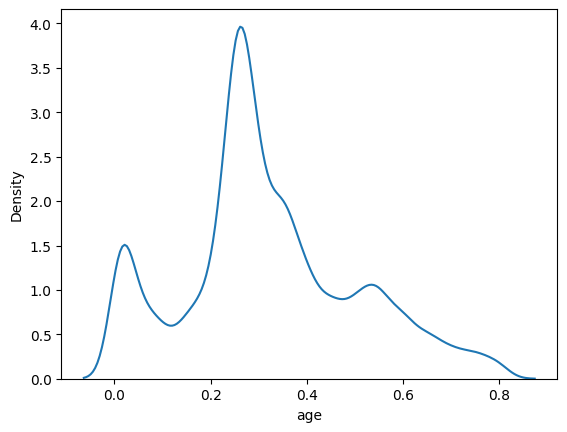

In [23]:
sns.kdeplot(df['age'])

<Axes: ylabel='age'>

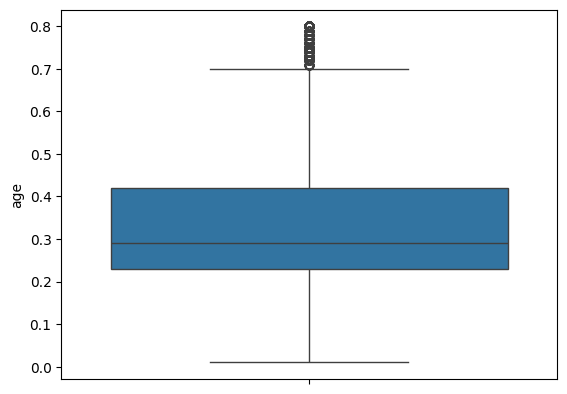

In [24]:
sns.boxplot(df['age'])

In [25]:
from sklearn.model_selection import train_test_split
trainDf,testDf=train_test_split(df,test_size=0.2,random_state=42)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
testDf

,filePath,age,gender
8555,53_1_0_20170110160643329.jpg.chip.jpg,0.53,1
12854,1_0_2_20161219222832191.jpg.chip.jpg,0.01,0
8120,19_0_2_20170110225634087.jpg.chip.jpg,0.19,0
21274,39_0_0_20170117184953833.jpg.chip.jpg,0.39,0
2245,31_1_0_20170105162529475.jpg.chip.jpg,0.31,1
...,...,...,...
5336,7_0_0_20170110225211960.jpg.chip.jpg,0.07,0
10862,41_0_3_20170119204231207.jpg.chip.jpg,0.41,0
19172,37_0_1_20170117192109027.jpg.chip.jpg,0.37,0
11270,5_1_2_20161219160221254.jpg.chip.jpg,0.05,1


In [ ]:
ageDatagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    width_shift_range=0.2,
    height_shift_range=0.2
)

In [ ]:
trainAgeDatagen = ageDatagen.flow_from_dataframe(
    dataframe=trainDf,
    directory=Dir,
    x_col='filePath',
    y_col='age',
    target_size=(224,224),
    batch_size = 16,
    class_mode = 'raw', # for generating a range of value of 0-100
    shuffle = True
)

Found 18534 validated image filenames.


In [ ]:
testAgeDatagen = ageDatagen.flow_from_dataframe(
    dataframe=testDf,
    directory=Dir,
    x_col='filePath',
    y_col='age',
    target_size=(224,224),
    batch_size = 16,
    class_mode = 'raw', # for generating a range of value of 0-100
    shuffle = True
)

Found 4634 validated image filenames.


In [ ]:
# Model Development for the age Prediction through images

In [37]:
from tensorflow.keras.layers import Flatten,Dense,Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model,Sequential

In [ ]:
modelAge = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')  # For age regression
])


modelAge.compile(optimizer='Adam',loss='mse',metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modelAge.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,985 (42.61 MB)

 Trainable params: 11,169,537 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
modelAge.fit(trainAgeDatagen,validation_data=testAgeDatagen,epochs=10)

Epoch 1/10
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 335s 289ms/step - loss: 35.8501 - mae: 2.2290 - val_loss: 0.7543 - val_mae: 0.2299
Epoch 2/10
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 341s 294ms/step - loss: 0.2015 - mae: 0.2111 - val_loss: 0.0655 - val_mae: 0.1607
Epoch 3/10
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 316s 273ms/step - loss: 0.0584 - mae: 0.1558 - val_loss: 0.0656 - val_mae: 0.1407
Epoch 4/10
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 322s 273ms/step - loss: 0.0376 - mae: 0.1420 - val_loss: 0.2632 - val_mae: 0.1427
Epoch 5/10
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 312s 269ms/step - loss: 0.0304 - mae: 0.1331 - val_loss: 0.0450 - val_mae: 0.1324
Epoch 6/10
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 311s 268ms/step - loss: 0.0305 - mae: 0.1310 - val_loss: 0.0388 - val_mae: 0.1391
Epoch 7/10
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 314s 271ms/step - loss: 0.0343 - mae: 0.1343 - val_loss: 0.0393 - val_mae: 0.1361
Epoch 8/10
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 308s 266ms/step - loss: 30.3915 - mae: 0.8385 - val_loss: 0.6726 - val_mae: 0.1887
Epoch 

# Model Development For Gender Detection

In [28]:
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2

In [29]:
mob=MobileNetV2(include_top=False,input_shape=(224,224,3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
for layer in mob.layers:
  layer.trainable = False

In [32]:
mob.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [33]:
GenderDatagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    width_shift_range=0.2,
    height_shift_range=0.2
)

In [34]:
trainGenderDatagen = GenderDatagen.flow_from_dataframe(
    dataframe=trainDf,
    directory=Dir,
    x_col='filePath',
    y_col='gender',
    target_size=(224,224),
    batch_size = 32,
    class_mode = 'raw', # for generating a range of value of 0-100
    shuffle = True
)

Found 18534 validated image filenames.


In [35]:
testGenderDatagen = GenderDatagen.flow_from_dataframe(
    dataframe=testDf,
    directory=Dir,
    x_col='filePath',
    y_col='gender',
    target_size=(224,224),
    batch_size = 32,
    class_mode = 'raw', # for generating a range of value of 0-100
    shuffle = True
)

Found 4634 validated image filenames.


In [38]:
x = mob.output
x = Flatten()(x)
x = Dense(128,activation = 'relu')(x)
output = Dense(1,activation='sigmoid')(x)
modelGen = Model(inputs=mob.input,outputs=output)

In [39]:
modelGen.compile(optimizer='Adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [40]:
modelGen.fit(trainGenderDatagen,validation_data = testGenderDatagen , epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
  4/580 ━━━━━━━━━━━━━━━━━━━━ 2:38 275ms/step - accuracy: 0.5059 - loss: 16.6303

KeyboardInterrupt: 

In [ ]:
modelGen.save('modelGender.h5')